In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Tus datos (copia de best subset)
N = 100
p = 8
X = np.random.normal(0, 1, (N, p))
beta_true = np.array([2.0, -1.5, 3.0, 0, 0, 0, 0, 0])
intercept_true = 1.0
y = intercept_true + X @ beta_true + np.random.normal(0, 2.0, N)

X_full = np.column_stack((np.ones(N), X))   # (100, 9)

# Mejor modelo: predictores 0 (intercepto) + 1,2,3
cols_best = [0, 1, 2, 3]  # indices 1,2,3 son los relevantes
X_best = X_full[:, cols_best]

In [8]:
n_boot = 1000
betas_boot = np.zeros((n_boot, 4))  # 4 params: intercepto + 3 predictores

for i in range(n_boot):
    # Resample con reemplazo
    idx = np.random.choice(N, N, replace=True)
    X_boot = X_best[idx]
    y_boot = y[idx]

    # Ajuste OLS en bootstrap sample
    betas = np.linalg.lstsq(X_boot, y_boot, rcond=None)[0]
    betas_boot[i] = betas

In [9]:
# Coeficientes promedio ( estimacion bootstrap)
betas_mean = np.mean(betas_boot, axis=0)

# Bias estimado (diferencia con verdaderos)
betas_true_selected = np.array([intercept_true, *beta_true[:3]])  # intercepto + 3 betas
bias = betas_mean - betas_true_selected

# Variance (desviacion standar de los coeficientes bootstrap)
variance = np.var(betas_boot, axis=0)

print("Coeficeinte bootstrap promedio:", betas_mean)
print("Bias estimado:", bias)
print("Variance estimada:", variance)

Coeficeinte bootstrap promedio: [ 1.4303211   2.11673821 -1.2172734   3.00670754]
Bias estimado: [0.4303211  0.11673821 0.2827266  0.00670754]
Variance estimada: [0.03617412 0.07294661 0.04055561 0.03842382]


<function matplotlib.pyplot.show(close=None, block=None)>

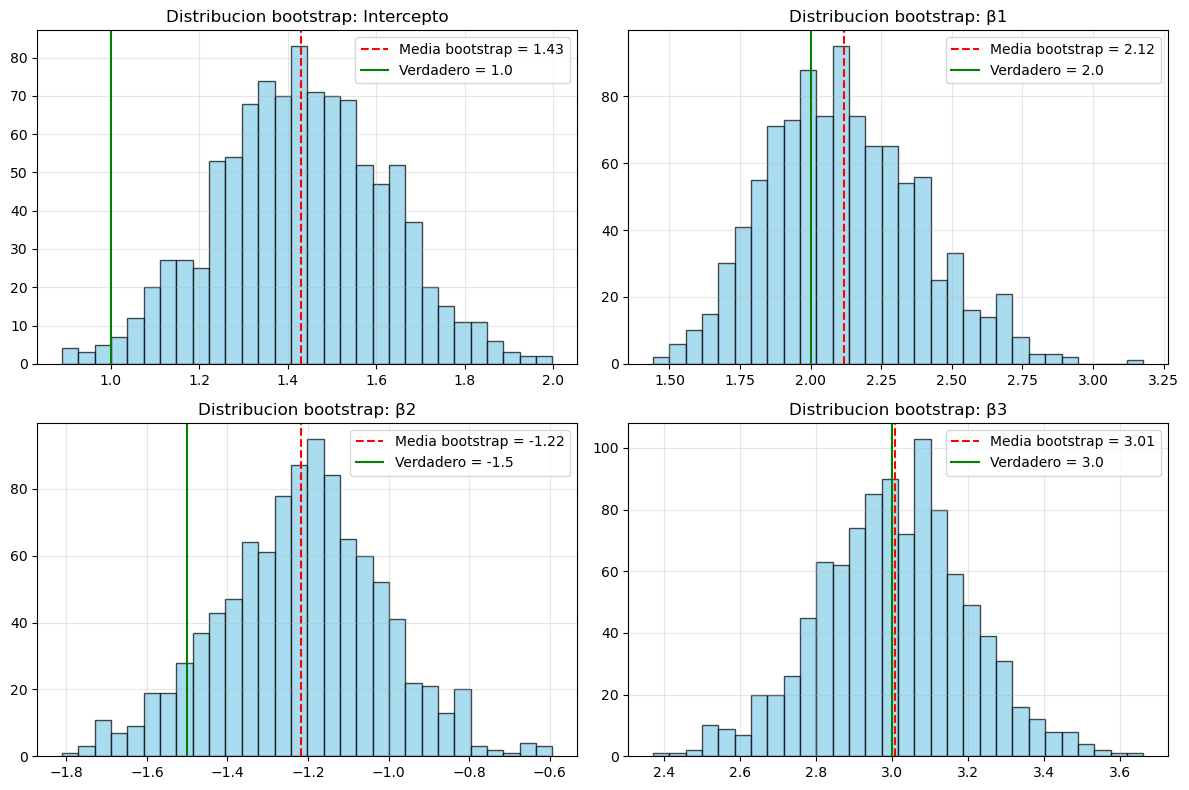

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

labels = ['Intercepto', 'β1', 'β2', 'β3']
true_values = [intercept_true] + list(beta_true[:3])

for i in range(4):
    axs[i].hist(betas_boot[:, i], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axs[i].axvline(betas_mean[i], color='red', linestyle='--', label=f'Media bootstrap = {betas_mean[i]:.2f}')
    axs[i].axvline(true_values[i], color='green', linestyle='-', label=f'Verdadero = {true_values[i]}')
    axs[i].set_title(f'Distribucion bootstrap: {labels[i]}')
    axs[i].legend()
    axs[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show
